In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns=None
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
url='https://drive.google.com/file/d/1kMQO8awxJb8nUldscCHQqXUq1OS4l9rz/view?usp=sharing'
dwn_url='https://drive.google.com/uc?id=' + url.split('/')[-2]
f = pd.read_csv(dwn_url);

In [3]:
url='https://drive.google.com/file/d/1HnIa7pbjg_dCNJOgP9KCJ-I_4l2lTgyJ/view?usp=sharing'
dwn_url='https://drive.google.com/uc?id=' + url.split('/')[-2]
d = pd.read_csv(dwn_url)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [4]:
d[d.duplicated()]

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
33106,2014,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,47249,21768,635,3514.79,Calendar,33135
147490,2013,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",Protection & Apprehension,School Crossing Guard,12266,8493,0,0.00,Calendar,9164
246237,2014,5,Culture & Recreation,REC,Recreation and Park Commission,323,Members of Boards and Commissions,Management,"Bdcomm Mbr, Grp5,M$100/Mo",26011,1200,0,0.00,Calendar,1294
268316,2014,3,Human Welfare & Neighborhood Development,ENV,Environment,323,Members of Boards and Commissions,Management,"Bdcomm Mbr, Grp2,M=$25/Mtg",32395,350,0,0.00,Calendar,377
280082,2013,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,47861,501,0,284.08,Calendar,824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [5]:
pd.concat((
    d.nunique().sort_values()[:-1],
    f.nunique(),
    d.dtypes[:-1],
    f.dtypes,
    d.isna().sum()[:-1],
    f.isna().sum()),1)

,0,1,2,3,4,5
YT,2,2,object,object,0,0
Year,4,4,int64,int64,0,0
OGC,7,7,int64,int64,0,0
OG,7,7,object,object,0,0
DC,54,54,object,object,0,0
Dept,54,54,object,object,0,0
JF,55,55,object,object,38,7
Union,73,70,object,object,36,7
UC,789,342,int64,int64,0,0
Job,1136,1019,object,object,0,0


In [6]:
for i in 'JF','Union':
    d[i].fillna(d[i].mode()[0], inplace=True)
    f[i].fillna(f[i].mode()[0], inplace=True)

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
Year,1.000000,-0.005849,-0.003789,0.002081,0.004376,0.015024,-0.013705,0.005986
OGC,-0.005849,1.000000,-0.006246,0.002137,-0.217733,-0.303169,-0.233033,-0.270160
UC,-0.003789,-0.006246,1.000000,-0.001493,-0.047408,0.059816,-0.073297,-0.032338
EI,0.002081,0.002137,-0.001493,1.000000,-0.004385,-0.001167,-0.003472,-0.003966
Salaries,0.004376,-0.217733,-0.047408,-0.004385,1.000000,0.271575,0.774898,0.972585
Overtime,0.015024,-0.303169,0.059816,-0.001167,0.271575,1.000000,0.312468,0.453497
H/D,-0.013705,-0.233033,-0.073297,-0.003472,0.774898,0.312468,1.000000,0.806283
Total_Compensation,0.005986,-0.270160,-0.032338,-0.003966,0.972585,0.453497,0.806283,1.000000


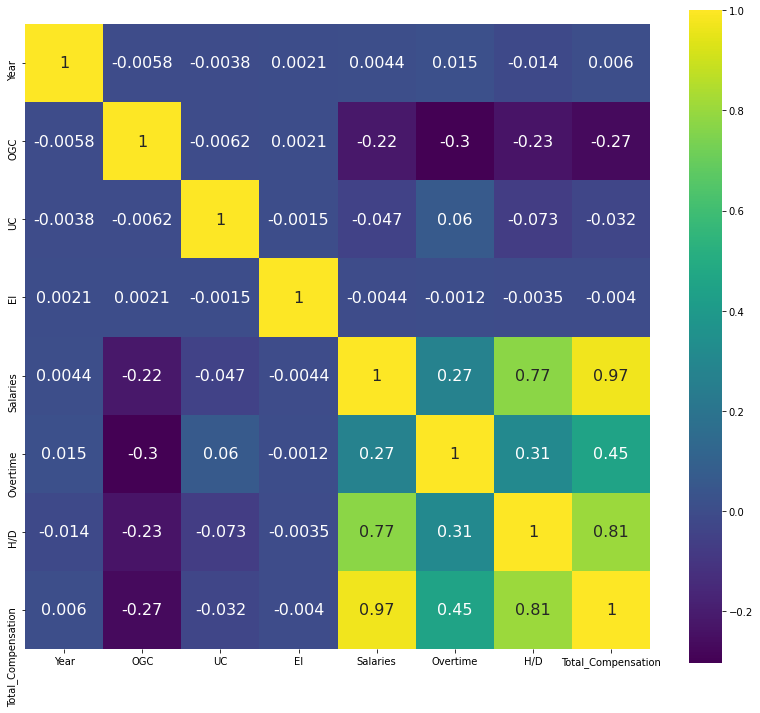

In [7]:
fig,ax=plt.subplots(figsize=(14,12))
sns.heatmap(d.corr(),square=1, annot=True, linecolor='w',cmap='viridis', annot_kws={'size':16})
d.corr()

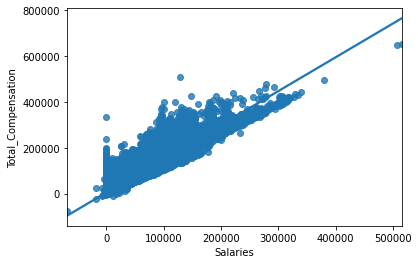

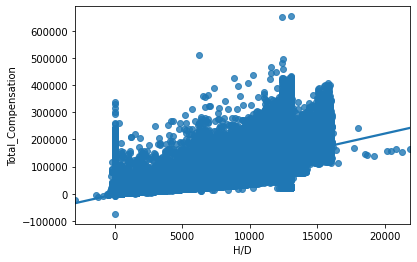

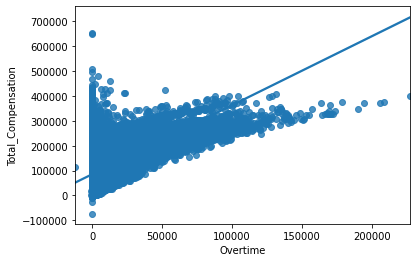

In [8]:
sns.regplot(data=d, y='Total_Compensation', x='Salaries')
plt.show()
sns.regplot(data=d, y='Total_Compensation', x='H/D')
plt.show()
sns.regplot(data=d, y='Total_Compensation', x='Overtime');

In [9]:
pd.concat((d.dtypes, f.dtypes),1)

,0,1
Year,int64,int64
OGC,int64,int64
OG,object,object
DC,object,object
Dept,object,object
UC,int64,int64
Union,object,object
JF,object,object
Job,object,object
EI,int64,int64


In [10]:
dnf=pd.concat((d,f))

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158.0
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784.0
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708.0
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323.0
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47855,2015,4,Community Health,DPH,Public Health,21,"Prof & Tech Engineers - Miscellaneous, Local 21","Budget, Admn & Stats Analysis",Senior Administrative Analyst,23825,91767,0,11176.32,Calendar,NaN
47856,2013,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021",Housekeeping & Laundry,Custodian,16397,44603,0,10471.44,Calendar,NaN
47857,2015,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",Housekeeping & Laundry,Custodian,37834,49274,0,11019.75,Fiscal,NaN
47858,2013,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Legal & Court,Parking Hearing Examiner,49141,69972,0,9699.15,Calendar,NaN


In [11]:
A=100
dnf.loc[:,dnf.nunique()<=A]=dnf.loc[:,dnf.nunique()<=A].astype('category')
dnf.drop('Dept', 1, inplace=True)
dnf.Year=dnf.Year.astype('int64')
dnf.loc[dnf.YT=='Calendar','Year']=dnf.loc[dnf.YT=='Calendar','Year']+0.5

In [12]:
dnf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335696 entries, 0 to 47859
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Year                335696 non-null  float64 
 1   OGC                 335696 non-null  category
 2   OG                  335696 non-null  category
 3   DC                  335696 non-null  category
 4   UC                  335696 non-null  int64   
 5   Union               335696 non-null  category
 6   JF                  335696 non-null  category
 7   Job                 335696 non-null  object  
 8   EI                  335696 non-null  int64   
 9   Salaries            335696 non-null  int64   
 10  Overtime            335696 non-null  int64   
 11  H/D                 335696 non-null  float64 
 12  YT                  335696 non-null  category
 13  Total_Compensation  287836 non-null  float64 
dtypes: category(6), float64(3), int64(4), object(1)
memory usage: 25.0+ M

In [13]:
dnf=pd.get_dummies(dnf,drop_first=True)

Year   UC     EI  Salaries  Overtime       H/D  Total_Compensation  \
0      2015.5  250   6725     12196         0      0.00             16158.0   
1      2013.0   39  25058     74639      2820  12703.31            115784.0   
2      2015.5   21  46108    100554         0  12424.50            144708.0   
3      2016.0  911  33369    140164     52754  13043.87            242323.0   
4      2013.5   21  28684     58813         0   7655.28             82106.0   
...       ...  ...    ...       ...       ...       ...                 ...   
47855  2015.5   21  23825     91767         0  11176.32                 NaN   
47856  2013.5  790  16397     44603         0  10471.44                 NaN   
47857  2015.0  790  37834     49274         0  11019.75                 NaN   
47858  2013.5   21  49141     69972         0   9699.15                 NaN   
47859  2015.5  791  38462    129524         0  12424.50                 NaN   

       OGC_2  OGC_3  OGC_4  OGC_5  OGC_6  OGC_7  OG_Culture & Recreation  \
0          0      0      1      0      0      0                        0   
1          0      0      1      0      0      0                        0   
2          0      0      0      0      1      0                        0   
3          0      0      0      0      0      0                        0   
4          1      0      0      0      0      0                        0   
...      ...    ...    ...    ...    ...    ...                      ...   
47855      0      0      1      0      0      0                        0   
47856      1      0      0      0      0      0                        0   
47857      0      0      0      1      0      0                        1   
47858      1      0      0      0      0      0                        0   
47859      0      0      1      0      0      0                        0   

       OG_General Administration & Finance  OG_General City Responsibilities  \
0                                        0                                 0   
1                                        0                                 0   
2                                        1                                 0   
3                                        0                                 0   
4                                        0                                 0   
...                                    ...                               ...   
47855                                    0                                 0   
47856                                    0                                 0   
47857                                    0                                 0   
47858                                    0                                 0   
47859                                    0                                 0   

       OG_Human Welfare & Neighborhood Development  OG_Public Protection  \
0                                                0                     0   
1                                                0                     0   
2                                                0                     0   
3                                                0                     1   
4                                                0                     0   
...                                            ...                   ...   
47855                                            0                     0   
47856                                            0                     0   
47857                                            0                     0   
47858                                            0                     0   
47859                                            0                     0   

       OG_Public Works, Transportation & Commerce  DC_ADM  DC_ADP  DC_AIR  \
0                                               0       0       0       0   
1                                               0       0       0       0   
2                                         

In [14]:
d=dnf.iloc[0:len(d)]
f=dnf.iloc[len(d):].drop('Total_Compensation',1)

Year   UC     EI  Salaries  Overtime           H/D  OGC_2  OGC_3  \
0      2016.0  790   6161     74526         0  13068.800000      1      0   
1      2013.5    1  17890      7219         0   3328.053046      0      1   
2      2016.0   21  15092      4616         0   1147.260000      1      0   
3      2015.5  535   5144      6345         0   1433.600000      0      1   
4      2015.5    6  40128    105851       153  12242.440000      1      0   
...       ...  ...    ...       ...       ...           ...    ...    ...   
47855  2015.5   21  23825     91767         0  11176.320000      0      0   
47856  2013.5  790  16397     44603         0  10471.440000      1      0   
47857  2015.0  790  37834     49274         0  11019.750000      0      0   
47858  2013.5   21  49141     69972         0   9699.150000      1      0   
47859  2015.5  791  38462    129524         0  12424.500000      0      0   

       OGC_4  OGC_5  OGC_6  OGC_7  OG_Culture & Recreation  \
0          0      0      0      0                        0   
1          0      0      0      0                        0   
2          0      0      0      0                        0   
3          0      0      0      0                        0   
4          0      0      0      0                        0   
...      ...    ...    ...    ...                      ...   
47855      1      0      0      0                        0   
47856      0      0      0      0                        0   
47857      0      1      0      0                        1   
47858      0      0      0      0                        0   
47859      1      0      0      0                        0   

       OG_General Administration & Finance  OG_General City Responsibilities  \
0                                        0                                 0   
1                                        0                                 0   
2                                        0                                 0   
3                                        0                                 0   
4                                        0                                 0   
...                                    ...                               ...   
47855                                    0                                 0   
47856                                    0                                 0   
47857                                    0                                 0   
47858                                    0                                 0   
47859                                    0                                 0   

       OG_Human Welfare & Neighborhood Development  OG_Public Protection  \
0                                                0                     0   
1                                                1                     0   
2                                                0                     0   
3                                                1                     0   
4                                                0                     0   
...                                            ...                   ...   
47855                                            0                     0   
47856                                            0                     0   
47857                                            0                     0   
47858                                            0                     0   
47859                                            0                     0   

       OG_Public Works, Transportation & Commerce  DC_ADM  DC_ADP  DC_AIR  \
0                                               1       0       0       1   
1                                               0       0       0       0   
2                                               1       0       0       0   
3                                               0       0       0       0   
4                                               1       0       0       0   
...

In [15]:
target=d.Total_Compensation
d=d.drop('Total_Compensation', 1)

Year   UC     EI  Salaries  Overtime       H/D  OGC_2  OGC_3  OGC_4  \
0       2015.5  250   6725     12196         0      0.00      0      0      1   
1       2013.0   39  25058     74639      2820  12703.31      0      0      1   
2       2015.5   21  46108    100554         0  12424.50      0      0      0   
3       2016.0  911  33369    140164     52754  13043.87      0      0      0   
4       2013.5   21  28684     58813         0   7655.28      1      0      0   
...        ...  ...    ...       ...       ...       ...    ...    ...    ...   
287831  2016.0  535   9610     78980     30115  13068.80      0      1      0   
287832  2015.5  790    790     30704         0   5465.57      0      0      0   
287833  2014.5    6  38352    104451         0  13054.94      1      0      0   
287834  2013.5  250  29266     14425         0   4051.90      0      0      0   
287835  2015.0  791  13906    105561      8945   7993.89      0      0      1   

        OGC_5  OGC_6  OGC_7  OG_Culture & Recreation  \
0           0      0      0                        0   
1           0      0      0                        0   
2           0      1      0                        0   
3           0      0      0                        0   
4           0      0      0                        0   
...       ...    ...    ...                      ...   
287831      0      0      0                        0   
287832      1      0      0                        1   
287833      0      0      0                        0   
287834      0      0      0                        0   
287835      0      0      0                        0   

        OG_General Administration & Finance  OG_General City Responsibilities  \
0                                         0                                 0   
1                                         0                                 0   
2                                         1                                 0   
3                                         0                                 0   
4                                         0                                 0   
...                                     ...                               ...   
287831                                    0                                 0   
287832                                    0                                 0   
287833                                    0                                 0   
287834                                    0                                 0   
287835                                    0                                 0   

        OG_Human Welfare & Neighborhood Development  OG_Public Protection  \
0                                                 0                     0   
1                                                 0                     0   
2                                                 0                     0   
3                                                 0                     1   
4                                                 0                     0   
...                                             ...                   ...   
287831                                            1                     0   
287832                                            0                     0   
287833                                            0                     0   
287834                                            0                     1   
287835                                            0                     0   

        OG_Public Works, Transportation & Commerce  DC_ADM  DC_ADP  DC_AIR  \
0                                                0       0       0       0   
1                                                0       0       0       0   
2                                                0       0       0       0   
3                                                0       0       0       0   
4                                                1       0       0       0  

In [16]:
model=XGBRegressor(tree_method='gpu_hist', gpu_id=0, max_depth=17)
model.fit(d,target)
g=pd.DataFrame(model.predict(f), columns=['Compensation'])
g.to_csv('33-EmployeeCompensationn.csv', index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [17]:
# for i in range(21,31):
#   model=XGBRegressor(tree_method='gpu_hist', gpu_id=0, max_depth=i)
#   model.fit(d,target)
#   g=pd.DataFrame(model.predict(f), columns=['Compensation'])
#   g.to_csv('33-EmployeeCompensations {}.csv'.format(i), index=False)

In [18]:
# grid={
#     'max_depth': [x for x in np.arange(1,10,1)]
# #     'learning_rate': [x for x in np.arange(0.01,0.1001,0.01)],
# #     'subsample': [x for x in np.arange(0.8,1.001,0.01)],
# #     'gamma': [0,1,5]
# }
# grid_search = GridSearchCV(XGBRegressor(tree_method='gpu_hist', gpu_id=0), grid, verbose = 2, cv=5)

In [19]:
# grid_search.fit(d, target)

In [20]:
# model=grid_search.best_estimator_
# model.fit(d,target)
# g=pd.DataFrame(model.predict(f), columns=['Compensation'])
# g.to_csv('33-EmployeeCompensationn.csv', index=False)

In [21]:
from IPython.display import FileLinks
FileLinks('.') # input argument is specified folder

./
  33-EmployeeCompensationn.csv
  __notebook_source__.ipynb